# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
path = "resources/"
files = glob.glob(os.path.join(path, "*_cleaned.csv"))

dataframes = []
for file in files:
    df = pd.read_csv(file)
    # Extract region name from file name
    region_name = os.path.basename(file).replace("_cleaned.csv", "")
    df["region"] = region_name
    dataframes.append(df)


data = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Basic info about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485991 entries, 0 to 485990
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               485991 non-null  object 
 1   EVENT_TYPE           485991 non-null  object 
 2   SUB_EVENT_TYPE       485991 non-null  object 
 3   EVENTS               485991 non-null  int64  
 4   POPULATION_EXPOSURE  485991 non-null  float64
 5   DISORDER_TYPE        485991 non-null  object 
 6   region               485991 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.0+ MB


In [4]:
numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include='object').columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['EVENTS', 'POPULATION_EXPOSURE']
Categorical Columns: ['REGION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'DISORDER_TYPE', 'region']


In [5]:
unique_counts = data.nunique().sort_values(ascending=False)
print(f"Number of Unique Values")
print(unique_counts)

Number of Unique Values
POPULATION_EXPOSURE    121675
EVENTS                    336
SUB_EVENT_TYPE             17
REGION                     16
region                      6
EVENT_TYPE                  5
DISORDER_TYPE               3
dtype: int64



Rows per region with percentage of total:

                 region  row_count  percent
                 africa     109001    22.43
latin_america_caribbean     108254    22.27
           asia_pacific      99766    20.53
    europe_central_asia      84045    17.29
            middle_east      67403    13.87
              us_canada      17522     3.61


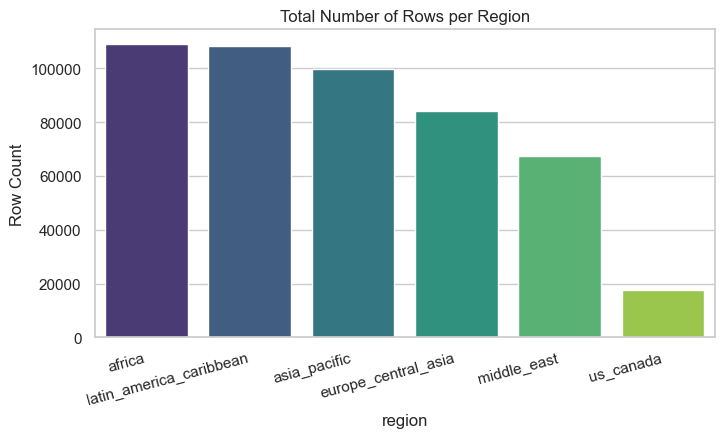

In [38]:
region_counts = data['region'].value_counts().reset_index()
region_counts.columns = ['region', 'row_count']
region_counts['percent'] = (region_counts['row_count'] / len(data) * 100).round(2)
print("\nRows per region with percentage of total:\n")
print(region_counts.to_string(index=False))

plt.figure(figsize=(8,4))
sns.barplot(data=region_counts, hue= 'region',x='region', y='row_count', palette='viridis')
plt.title("Total Number of Rows per Region")
plt.xticks(rotation=15, ha='right')
plt.ylabel("Row Count")
plt.show()


Rows per region with percentage of total:

                   REGION  row_count  percent
                   Europe      75275    15.49
              Middle East      67403    13.87
            South America      63496    13.07
            North America      40485     8.33
               South Asia      38131     7.85
           Western Africa      34980     7.20
           Eastern Africa      34544     7.11
           Southeast Asia      30513     6.28
Caucasus and Central Asia      19875     4.09
          Northern Africa      18836     3.88
                East Asia      16443     3.38
            Middle Africa      13994     2.88
          Central America      11284     2.32
                Caribbean      10511     2.16
          Southern Africa       6647     1.37
                  Oceania       3574     0.74


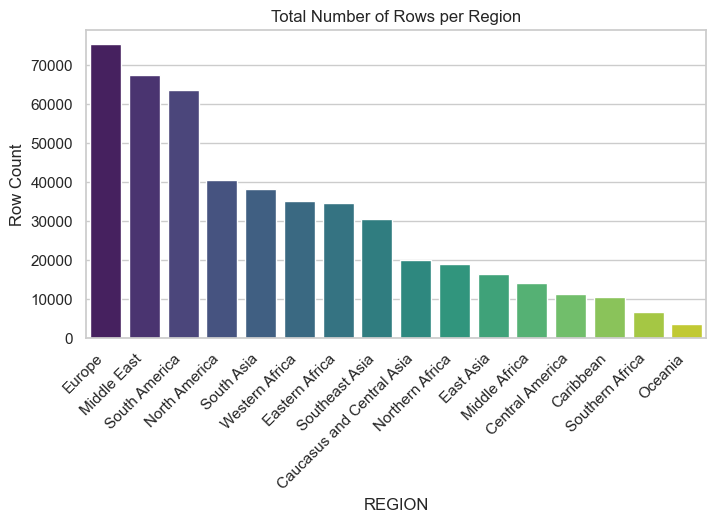

In [37]:
regions_counts = data['REGION'].value_counts().reset_index()
regions_counts.columns = ['REGION', 'row_count']
regions_counts['percent'] = (regions_counts['row_count'] / len(data) * 100).round(2)
print("\nRows per region with percentage of total:\n")
print(regions_counts.to_string(index=False))

plt.figure(figsize=(8,4))
sns.barplot(data=regions_counts, hue= 'REGION',x='REGION', y='row_count', palette='viridis')
plt.title("Total Number of Rows per Region")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Row Count")
plt.show()


Rows per EVENT_TYPE with percentage of total:

                EVENT_TYPE  row_count  percent
                  Protests     236072    48.58
Violence against civilians      88639    18.24
                   Battles      60634    12.48
                     Riots      55246    11.37
Explosions/Remote violence      45400     9.34


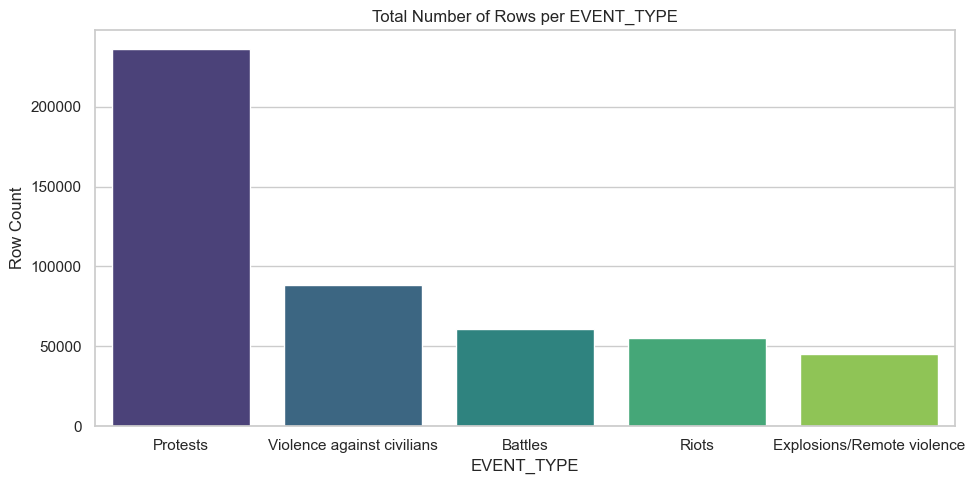

In [35]:
event_counts = data['EVENT_TYPE'].value_counts().reset_index()
event_counts.columns = ['EVENT_TYPE', 'row_count']


event_counts['percent'] = (event_counts['row_count'] / len(data) * 100).round(2)


print("\nRows per EVENT_TYPE with percentage of total:\n")
print(event_counts.to_string(index=False))


plt.figure(figsize=(10,5))
sns.barplot(
    data=event_counts,
    x='EVENT_TYPE',
    y='row_count',
    hue='EVENT_TYPE',
    palette='viridis',
    legend=False
)
plt.title("Total Number of Rows per EVENT_TYPE")
plt.xticks()
plt.ylabel("Row Count")
plt.tight_layout()
plt.show()



Rows per SUB_EVENT_TYPE with percentage of total:

                     SUB_EVENT_TYPE  row_count  percent
                   Peaceful protest     213522    43.94
                             Attack      69865    14.38
                        Armed clash      57935    11.92
                       Mob violence      30451     6.27
              Violent demonstration      24795     5.10
          Protest with intervention      20736     4.27
     Abduction/forced disappearance      16320     3.36
      Remote explosive/landmine/IED      16210     3.34
                   Air/drone strike      13696     2.82
  Shelling/artillery/missile attack      11861     2.44
                            Grenade       3305     0.68
                    Sexual violence       2454     0.50
 Excessive force against protesters       1814     0.37
       Government regains territory       1355     0.28
Non-state actor overtakes territory       1344     0.28
                       Suicide bomb        321     0

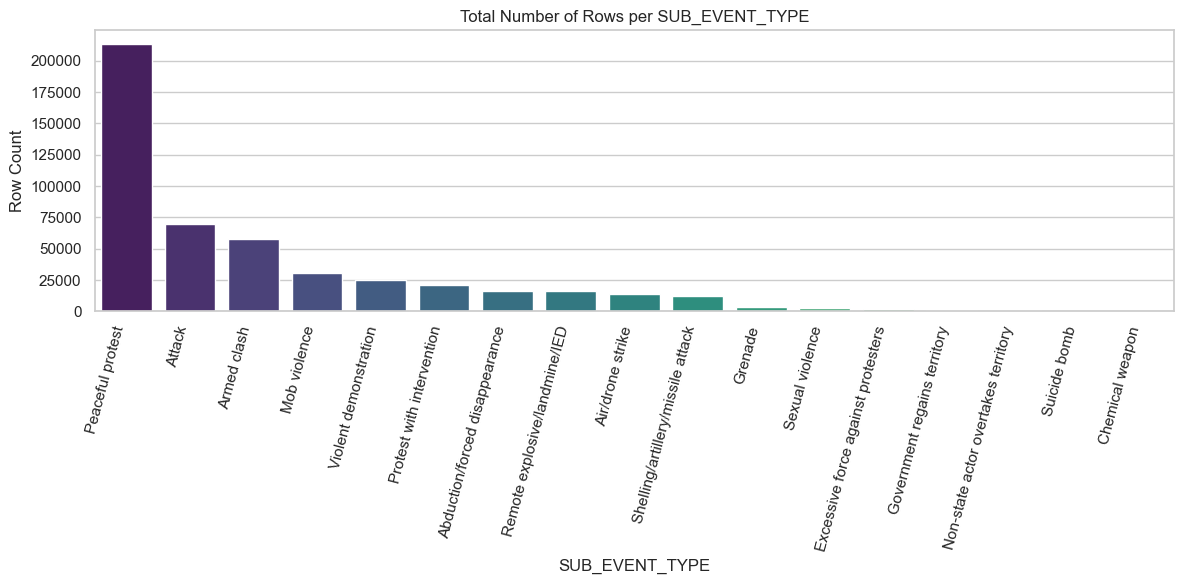

In [39]:
sub_event_counts = data['SUB_EVENT_TYPE'].value_counts().reset_index()
sub_event_counts.columns = ['SUB_EVENT_TYPE', 'row_count']

sub_event_counts['percent'] = (sub_event_counts['row_count'] / len(data) * 100).round(2)

print("\nRows per SUB_EVENT_TYPE with percentage of total:\n")
print(sub_event_counts.to_string(index=False))

plt.figure(figsize=(12,6))
sns.barplot(
    data=sub_event_counts,
    x='SUB_EVENT_TYPE',
    y='row_count',
    hue='SUB_EVENT_TYPE',
    palette='viridis',
    legend=False
)
plt.title("Total Number of Rows per SUB_EVENT_TYPE")
plt.xticks(rotation=75, ha='right')
plt.ylabel("Row Count")
plt.tight_layout()
plt.show()



Rows per DISORDER_TYPE with percentage of total:

                     DISORDER_TYPE  row_count  percent
                    Demonstrations     259053    53.30
                Political violence     225124    46.32
Political violence; Demonstrations       1814     0.37


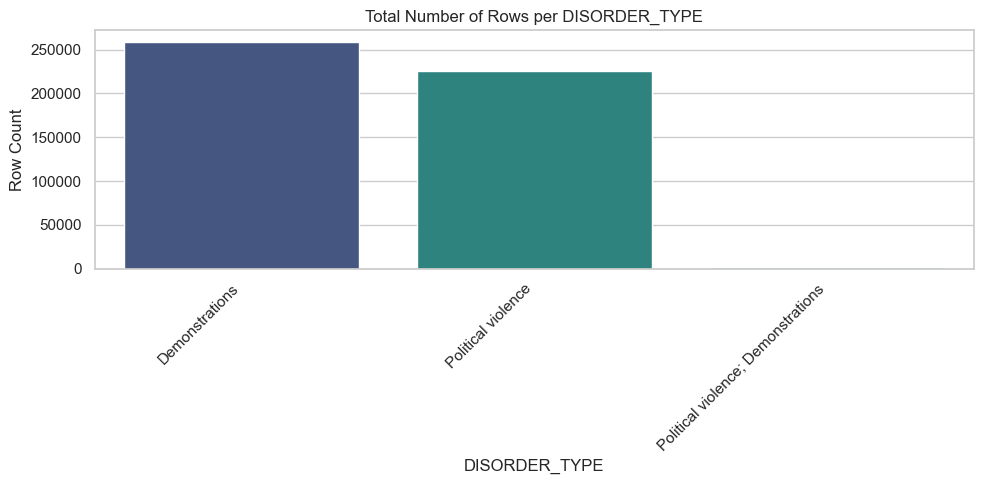

In [40]:
disorder_counts = data['DISORDER_TYPE'].value_counts().reset_index()
disorder_counts.columns = ['DISORDER_TYPE', 'row_count']

disorder_counts['percent'] = (disorder_counts['row_count'] / len(data) * 100).round(2)

print("\nRows per DISORDER_TYPE with percentage of total:\n")
print(disorder_counts.to_string(index=False))

plt.figure(figsize=(10,5))
sns.barplot(
    data=disorder_counts,
    x='DISORDER_TYPE',
    y='row_count',
    hue='DISORDER_TYPE',
    palette='viridis',
    legend=False
)
plt.title("Total Number of Rows per DISORDER_TYPE")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Row Count")
plt.tight_layout()
plt.show()


,EVENTS,POPULATION_EXPOSURE
count,485991.000000,4.859910e+05
mean,3.677620,6.876454e+04
std,10.237879,1.826946e+05
min,1.000000,1.000000e+00
25%,1.000000,7.024000e+03
50%,1.000000,1.981400e+04
75%,3.000000,5.751400e+04
max,428.000000,7.334413e+06


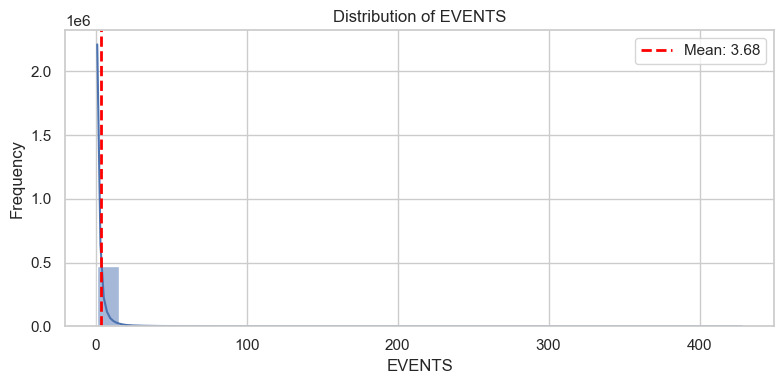

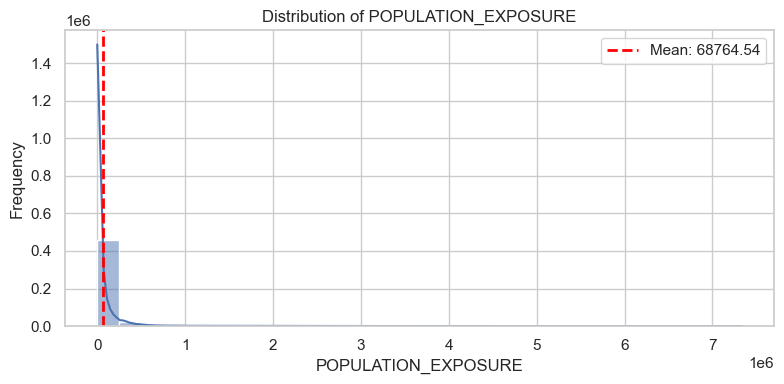

In [49]:
numeric_cols = ['EVENTS', 'POPULATION_EXPOSURE']

# Summary statistics
display(data[numeric_cols].describe())

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], bins=30, kde=True)
    
    # Calculate the mean
    mean_val = data[col].mean()
    
    # Add a red dashed line for the mean
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()  # Show the mean label
    plt.tight_layout()
    plt.show()



=== Statistics for EVENTS by Region ===

                 region  count  mean  median  min  max   std
                 africa 109001  2.00     1.0    1   92  2.60
           asia_pacific  99766  3.99     2.0    1  190  8.08
    europe_central_asia  84045  5.72     1.0    1  428 19.46
latin_america_caribbean 108254  2.67     1.0    1  371  4.00
            middle_east  67403  4.54     2.0    1  324 10.71
              us_canada  17522  5.39     3.0    1  342  9.33


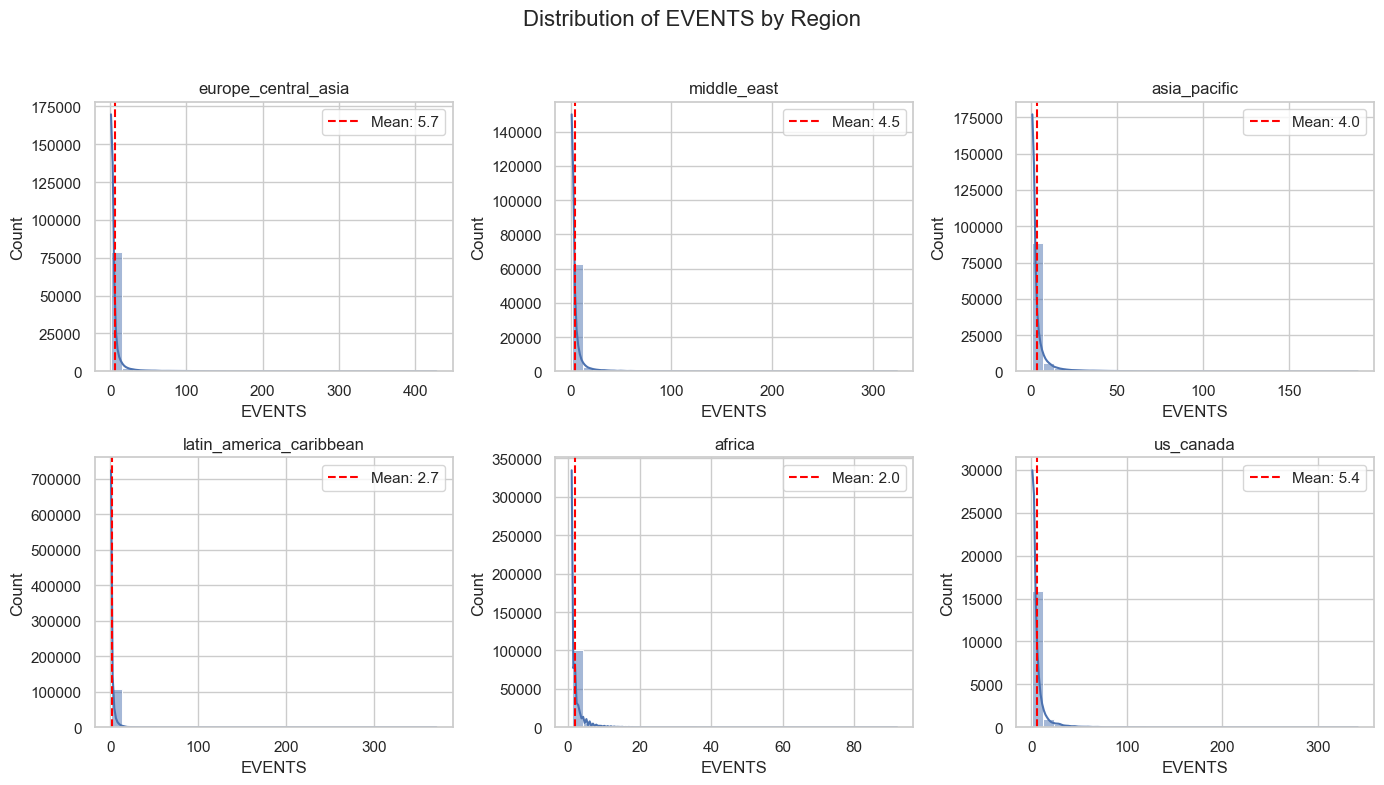


=== Statistics for POPULATION_EXPOSURE by Region ===

                 region  count      mean  median  min       max       std
                 africa 109001  36482.15 13132.0  1.0 3118803.0  80062.27
           asia_pacific  99766  95236.80 34827.0  1.0 5030356.0 202667.46
    europe_central_asia  84045  38754.52 12400.0  1.0 4487092.0  79800.13
latin_america_caribbean 108254 117954.27 32261.0  1.0 5364114.0 295018.27
            middle_east  67403  49990.01 19480.0  1.0 7334413.0 111404.98
              us_canada  17522  31123.25 12565.0  2.0 1407589.0  59128.96


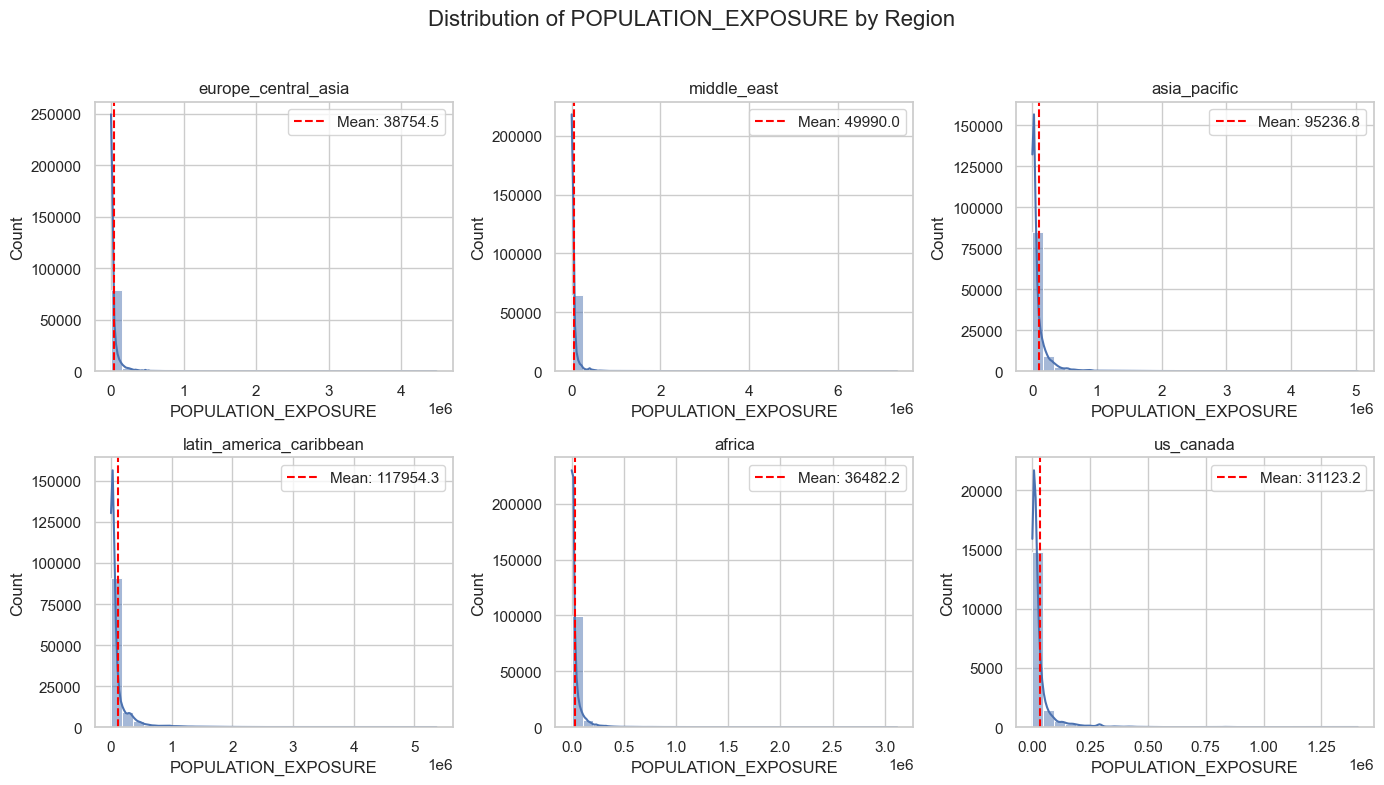

In [46]:
regions = data['region'].unique()

for col in numeric_cols:

    stats = (
        data.groupby('region')[col]
        .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        .round(2)
        .reset_index()
    )

    print(f"\n=== Statistics for {col} by Region ===\n")
    print(stats.to_string(index=False))

    plt.figure(figsize=(14, 8))
    plt.suptitle(f"Distribution of {col} by Region", fontsize=16)

    for i, r in enumerate(regions, 1):
        plt.subplot(2, 3, i)  # 2 rows × 3 columns
        subset = data[data['region'] == r]
        sns.histplot(subset[col], bins=30, kde=True)
        plt.title(r)
        plt.xlabel(col)
        plt.ylabel("Count")

        # Optional: display the mean directly on each subplot
        mean_val = subset[col].mean()
        plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.1f}")
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
